In [112]:
N = ord("M") % 5 + 1
N

3

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

In [114]:
df = pd.read_excel('lab6.xlsx')
variant = df.loc[N-1]
image = 'Images/' + variant["file name"]
size = variant["image size"]
color = variant["glasses color"]
width = variant["line width"]
print(variant)

N                        3
file name        draco.jpg
image size         700x700
glasses color         cian
line width               4
Name: 2, dtype: object


In [115]:
def get_color_by_name(color_name):
    color_dict = {
        "red": (0, 0, 255),
        "blue": (255, 0, 0),
        "cian": (255, 255, 0),
        "magenta": (255, 0, 255),
        "yellow": (0, 255, 255)
    }

    return color_dict.get(color_name, (0, 0, 0))

def get_size(matrix_size_string):
    return int(matrix_size_string.split('x')[0])
    
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

In [119]:
def crop_img(image, size):
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    if len(faces) > 0:
        x, y, w, h = faces[0]
        if w > 0 and h > 0:
            center_x = x + w // 2
            center_y = y + h // 2

            target_size = (get_size(size), get_size(size))

            crop_x = max(0, center_x - target_size[0] // 2)
            crop_y = max(0, center_y - target_size[1] // 2)
            crop_w = min(target_size[0], img.shape[1] - crop_x)
            crop_h = min(target_size[1], img.shape[0] - crop_y)

            cropped_face = img[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]

            resized_face = cv.resize(cropped_face, target_size)

            cv.imwrite('face.png', resized_face)
            print("Cropped and resized face saved as 'cropped_resized_face.png'")
        else:
            print("Detected face has an invalid size.")
    else:
        print("No faces detected.")

In [120]:
def draw_glasses(image, size, color, width):
    crop_img(image, size)
    colorName = get_color_by_name(color)
    img = cv.imread("face.png")
    eyes = eye_cascade.detectMultiScale(img)

    for ex,ey, ew, eh in eyes:
        cv.circle(img, (ex+30,ey+30), 35, colorName, width)
        
       
    if len(eyes) == 2:
        eye1_x, eye1_y, _, _ = eyes[0]
        eye2_x, eye2_y, _, _ = eyes[1]
        cv.line(img, (eye1_x, eye1_y + 30), (eye2_x+60, eye2_y + 30), colorName, width)
        cv.line(img, (eye2_x - 15, eye2_y + 30), (eye2_x + 30 - 35, eye2_y + 30), colorName, width)
        cv.line(img, (eye1_x + 30 + 35, eye1_y + 30), (eye1_x + 30 + 35 + 10, eye1_y + 30), colorName, width)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Cropped and resized face saved as 'cropped_resized_face.png'


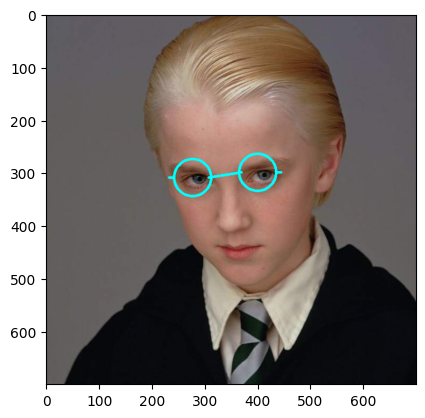

In [121]:
draw_glasses(image, size, color, width)